In [1]:
from utils import set_seed, load_data, load_processed_data
import numpy as np

In [4]:
dataset ='FB15k-237'
entity2id, relation2id, train_triplets, valid_triplets, train_triplets = load_data('./Dataset/raw_data/{}'.format(dataset))

meta_train_task_entity_to_triplets, meta_valid_task_entity_to_triplets, meta_test_task_entity_to_triplets \
    = load_processed_data('./Dataset/processed_data/{}'.format(dataset))
        

load data from ./Dataset/raw_data/FB15k-237
num_entity: 14541
num_relation: 237
num_train_triples: 272115
num_valid_triples: 17535
num_test_triples: 20466


In [5]:
# training dataset
# 2500/1000/1500
train_entity = set(meta_train_task_entity_to_triplets.keys())
valid_entity = set(meta_valid_task_entity_to_triplets.keys())
test_entity = set(meta_test_task_entity_to_triplets.keys())
print('num_train_entity: ', len(train_entity))
print('num_valid_entity: ', len(valid_entity))
print('num_test_entity: ', len(test_entity))

num_train_entity:  2500
num_valid_entity:  1000
num_test_entity:  1500


In [18]:
counts = np.zeros(95, dtype=int)

for unseen in list(train_entity):
    triplets = meta_train_task_entity_to_triplets[unseen]
    counts[len(triplets)] += 1

[ 0  0  0  0  1  2 12 29 51 82 87 92 88 83 81 69 78 66 58 77 55 70 55 50
 48 53 55 38 32 53 59 52 62 49 46 53 39 34 36 30 23 17 25 29 22 27 23 30
 24 22 17 15 16 19 19 17 12 13 12 11 16 16  7 12 12 10  6  8  7  8  5  9
  9  2  5  4  3  7  6  6  6  1  1  1  4  3  2  0  0  0  3  2  0  0  1]


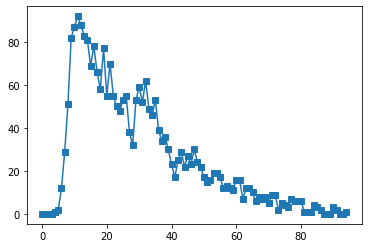

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
print(counts)
plt.plot(np.array(list(range(95))), counts, 's-')
plt.show()

In [22]:
# training dataset里面少于13个三元组的节点个数 - 527
counts[:14].sum()

527

In [24]:
# 计算累计值
np.cumsum(counts)

array([   0,    0,    0,    0,    1,    3,   15,   44,   95,  177,  264,
        356,  444,  527,  608,  677,  755,  821,  879,  956, 1011, 1081,
       1136, 1186, 1234, 1287, 1342, 1380, 1412, 1465, 1524, 1576, 1638,
       1687, 1733, 1786, 1825, 1859, 1895, 1925, 1948, 1965, 1990, 2019,
       2041, 2068, 2091, 2121, 2145, 2167, 2184, 2199, 2215, 2234, 2253,
       2270, 2282, 2295, 2307, 2318, 2334, 2350, 2357, 2369, 2381, 2391,
       2397, 2405, 2412, 2420, 2425, 2434, 2443, 2445, 2450, 2454, 2457,
       2464, 2470, 2476, 2482, 2483, 2484, 2485, 2489, 2492, 2494, 2494,
       2494, 2494, 2497, 2499, 2499, 2499, 2500])

In [8]:
# # 训练集有关的triplets
# train_entity_ = set(meta_train_task_triplets[:, 0]) | set(meta_train_task_triplets[:, 2])  # 并集， 9578
# # no_train_entity = train_entity_ - train_entity  # 除了训练使用的entity之外其他的entity
# print(no_train_entity & valid_entity)
# print(no_train_entity & test_entity)

In [7]:
# # 测试集有关的triplets
# test_entity_ = set(meta_test_task_triplets[:, 0]) | set(meta_test_task_triplets[:, 2])  # 并集， 4877
# no_test_entity = test_entity_ - test_entity  # 除了训练使用的entity之外其他的entity
# print(no_test_entity & valid_entity)
# print(no_test_entity & train_entity)

In [6]:
# # 验证集有关的triplets
# valid_entity_ = set(meta_valid_task_triplets[:, 0]) | set(meta_valid_task_triplets[:, 2])  # 并集， 4877
# no_valid_entity = valid_entity_ - valid_entity  # 除了训练使用的entity之外其他的entity
# print(no_valid_entity & valid_entity)
# print(no_valid_entity & train_entity)